In [1]:
%load_ext yamlmagic
from simtool import Run, get_inputs, get_outputs
import numpy as np

In [2]:
nb = 'melting_KIM'

In [3]:
# get the list of inputs for the simtool.
inputs = get_inputs(nb)
inputs

material:
    type: Text
    maxlen: 2
    options: ['Ni', 'Al', 'Fe', 'Co', 'Ti', 'W']
    value: Ni

crystal_structure:
    type: Text
    options: ['fcc', 'bcc', 'hcp']
    value: fcc

lattice_parameter:
    type: Number
    min: 3
    max: 5.5
    units: angstrom
    value: 3.5203

mass:
    type: Element
    property: atomic_weight
    value: 58.6934

Tsolid:
    type: Number
    min: 1
    max: 4000
    units: kelvin
    value: 500

Tliquid:
    type: Number
    min: 1
    max: 4000
    units: kelvin
    value: 2000

kim_model_name:
    type: Text
    value: EAM_Dynamo_PurjaPun_Mishin_NiAl__MO_751354403791_004

In [4]:
get_outputs(nb)

final_snapshot:
    desc: JPG of final structure
    type: Image

melting_temperature:
    desc: The melting temperature
    type: Number
    units: kelvin

LAMMPS_log:
    desc: Lammps log file
    type: Text

time_series:
    desc: Time
    type: Array
    units: picosecond

temperature_series:
    desc: Temperature
    type: Array
    units: kelvin

potential_energy_series:
    type: Array
    units: electron_volt

volume_series:
    type: Array
    units: angstrom ** 3

In [5]:
# does not work with submit yet due to cell 8 in the simtool which writes a bash script that does not work on clusters
r = Run(nb, inputs)

CACHED. Fetching results from Data Store.


In [6]:
db = r.db
db.nb.scrap_dataframe

,name,data,encoder,display,filename
0,final_snapshot,file://final.jpg,text,None,melting_KIM.ipynb
1,melting_temperature,"{""py/reduce"": [{""py/function"": ""numpy.core.mul...",text,None,melting_KIM.ipynb
2,LAMMPS_log,"""LAMMPS (22 Aug 2018)\n\n #LAMMPS input fil...",text,None,melting_KIM.ipynb
3,time_series,"{""py/reduce"": [{""py/function"": ""numpy.core.mul...",text,None,melting_KIM.ipynb
4,temperature_series,"{""py/reduce"": [{""py/function"": ""numpy.core.mul...",text,None,melting_KIM.ipynb
5,potential_energy_series,"[-20505.598, -20505.598, -20097.171, -20046.13...",text,None,melting_KIM.ipynb
6,volume_series,"[50256.415, 50256.415, 51797.284, 50670.034, 5...",text,None,melting_KIM.ipynb


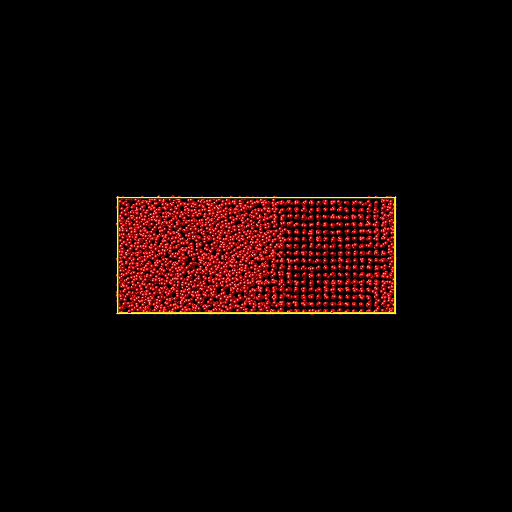

In [7]:
db.read('final_snapshot')

In [8]:
db.read('melting_temperature')

1771.7062513245032

In [9]:
import plotly.graph_objs as go
time = db.read('time_series')
temp = db.read('temperature_series')
p = go.FigureWidget()
p.add_scatter(x=time, y=temp)
# p.layout = {'title': nb.filename}
p.layout.xaxis = {'title': 'Time (picoseconds)'}
p.layout.yaxis = {'title': 'Temperature (K)'}
display(p)

FigureWidget({
    'data': [{'type': 'scatter',
              'uid': '45cb8dba-ee2d-4a13-bc09-bddfc2b4352f',
 …